In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
idx = pd.IndexSlice
sns.set_style("darkgrid")

In [2]:
segp = r'C:\Users\b1090197\OneDrive\Documents\XSki\xski\files\segment_times.csv'
sp = r'C:\Users\b1090197\OneDrive\Documents\XSki\xski\files\split_times.csv'

seg_time = pd.read_csv(segp, header=[0,1], index_col=[0])
seg_time.columns.rename("Participant", level=0, inplace=True)
seg_time.columns.rename("Intensity", level=1, inplace=True)

splits = pd.read_csv(sp, header=[0,1], index_col=[0])
splits.columns.rename("Participant", level=0, inplace=True)
splits.columns.rename("Intensity", level=1, inplace=True)

In [3]:
splits

Participant          P3                                  P5             \
Intensity          easy        hard      medium        easy       hard   
seg1_flat     74.150000   61.583333   66.979167   43.158333  31.100000   
seg2_up      117.154167   96.083333  103.729167   55.158333  39.100000   
seg3_down    124.904167  103.833333  110.979167   60.908333  44.600000   
seg4_turn    158.654167  138.333333  144.479167   79.158333  60.350000   
seg5_up      179.904167  156.083333  164.479167   86.158333  65.350000   
seg6_down    198.404167  172.083333  183.229167   95.908333  73.850000   
seg7_flat    245.583333  216.208333  214.925000  123.225000  95.491667   

Participant                      P6                                 P7  \
Intensity        medium        easy       hard      medium        easy   
seg1_flat     34.216667   39.020833  27.579167   34.520833   55.391667   
seg2_up       43.716667   50.775000  34.079167   43.020833   74.391667   
seg3_down     49.216667   56.525000  38.829167   48.270833   81.391667   
seg4_turn     65.720833   76.275000  52.079167   64.770833  111.391667   
seg5_up       70.970833   82.525000  56.079167   69.520833  124.641667   
seg6_down     79.720833   92.025000  63.329167   77.520833  135.641667   
seg7_flat    100.637500  123.991667  92.720833  107.870833  178.258333   

Participant                                 P12                          \
Intensity          hard      medium        easy        hard      medium   
seg1_flat     37.462500   44.808333   73.712500   60.720833   65.750000   
seg2_up       49.212500   58.808333  105.212500   90.720833   90.250000   
seg3_down     55.462500   65.308333  113.712500   98.475000   97.500000   
seg4_turn     76.712500   89.058333  147.962500  132.225000  130.004167   
seg5_up       84.962500   98.058333  170.466667  152.975000  148.754167   
seg6_down     94.212500  108.058333  186.466667  165.225000  160.754167   
seg7_flat    122.279167  141.683333  238.212500  199.450000  206.662500   

Participant         P13                        
Intensity          easy      hard      medium  
seg1_flat     45.479167   36.3125   39.233333  
seg2_up       59.979167   46.3125   49.983333  
seg3_down     65.729167   51.5625   55.483333  
seg4_turn     82.979167   65.3125   71.487500  
seg5_up       90.729167   70.5625   78.237500  
seg6_down    101.479167   80.3125   88.237500  
seg7_flat    129.625000  101.6375  113.745833

In [4]:
seg_time

Participant         P3                               P5                        \
Intensity         easy       hard     medium       easy       hard     medium   
seg1_flat    74.150000  61.583333  66.979167  43.158333  31.100000  34.216667   
seg2_up      43.004167  34.500000  36.750000  12.000000   8.000000   9.500000   
seg3_down     7.750000   7.750000   7.250000   5.750000   5.500000   5.500000   
seg4_turn    33.750000  34.500000  33.500000  18.250000  15.750000  16.504167   
seg5_up      21.250000  17.750000  20.000000   7.000000   5.000000   5.250000   
seg6_down    18.500000  16.000000  18.750000   9.750000   8.500000   8.750000   
seg7_flat    47.179167  44.125000  31.695833  27.316667  21.641667  20.916667   

Participant         P6                               P7                        \
Intensity         easy       hard     medium       easy       hard     medium   
seg1_flat    39.020833  27.579167  34.520833  55.391667  37.462500  44.808333   
seg2_up      11.754167   6.500000   8.500000  19.000000  11.750000  14.000000   
seg3_down     5.750000   4.750000   5.250000   7.000000   6.250000   6.500000   
seg4_turn    19.750000  13.250000  16.500000  30.000000  21.250000  23.750000   
seg5_up       6.250000   4.000000   4.750000  13.250000   8.250000   9.000000   
seg6_down     9.500000   7.250000   8.000000  11.000000   9.250000  10.000000   
seg7_flat    31.966667  29.391667  30.350000  42.616667  28.066667  33.625000   

Participant        P12                              P13                      
Intensity         easy       hard     medium       easy     hard     medium  
seg1_flat    73.712500  60.720833  65.750000  45.479167  36.3125  39.233333  
seg2_up      31.500000  30.000000  24.500000  14.500000  10.0000  10.750000  
seg3_down     8.500000   7.754167   7.250000   5.750000   5.2500   5.500000  
seg4_turn    34.250000  33.750000  32.504167  17.250000  13.7500  16.004167  
seg5_up      22.504167  20.750000  18.750000   7.750000   5.2500   6.750000  
seg6_down    16.000000  12.250000  12.000000  10.750000   9.7500  10.000000  
seg7_flat    51.745833  34.225000  45.908333  28.145833  21.3250  25.508333

In [5]:
# sort by intensity
splits = pd.concat([splits.loc[:,idx[:,'easy']], splits.loc[:,idx[:,'medium']], splits.loc[:,idx[:,'hard']]], axis=1)
seg_time= pd.concat([seg_time.loc[:,idx[:,'easy']], seg_time.loc[:,idx[:,'medium']], seg_time.loc[:,idx[:,'hard']]], axis=1)

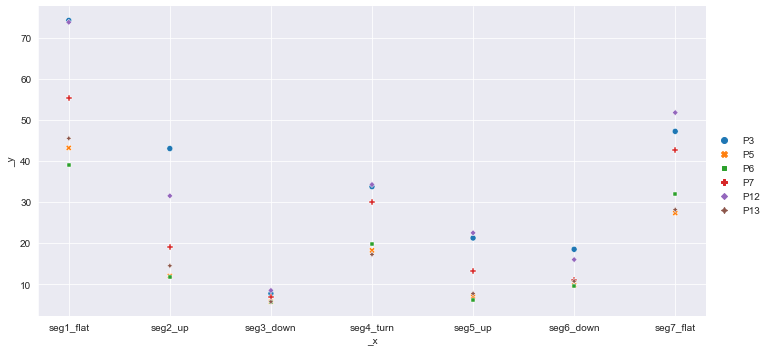

In [38]:
sns.relplot(data=seg_time.loc[:,idx[:,'easy']], aspect=2)

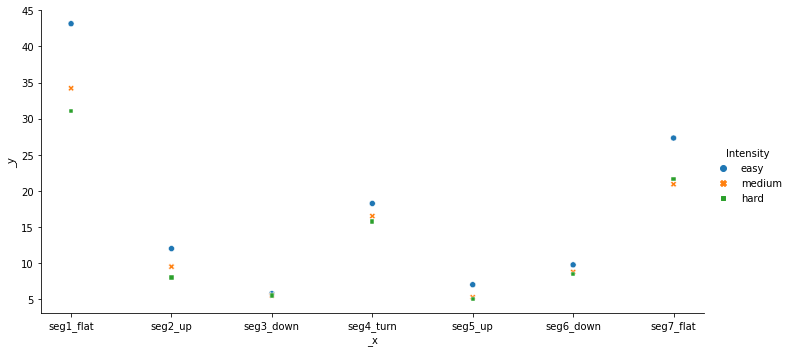

In [19]:
sns.relplot(data=seg_time['P5'], aspect=2)

In [24]:
splits.columns.get_level_values(0).unique()

Index(['P3', 'P5', 'P6', 'P7', 'P12', 'P13'], dtype='object', name='Participant')

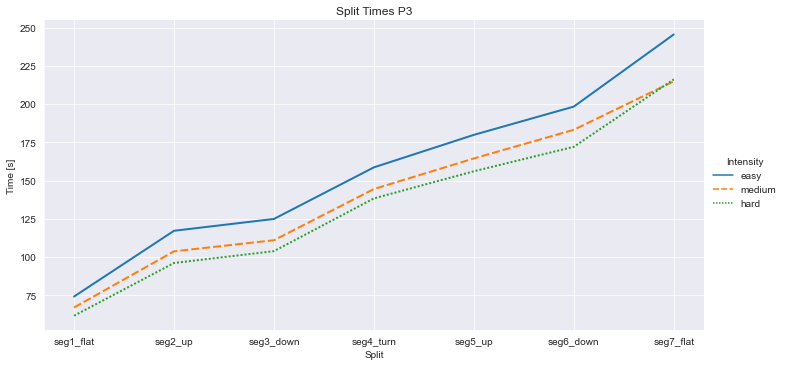

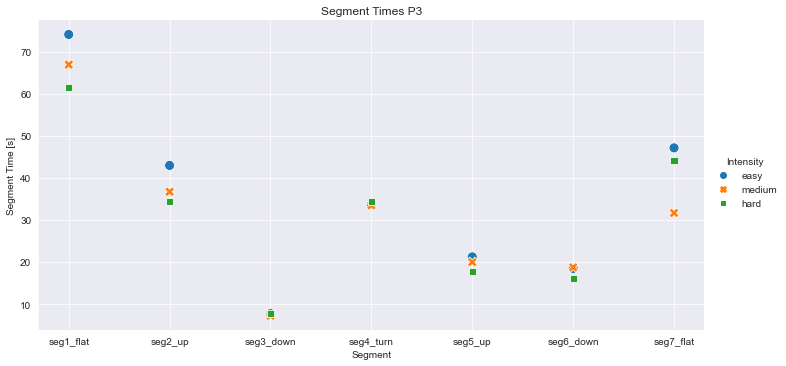

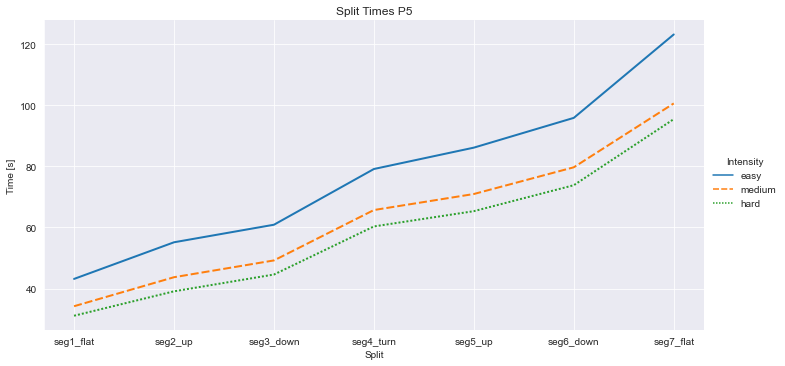

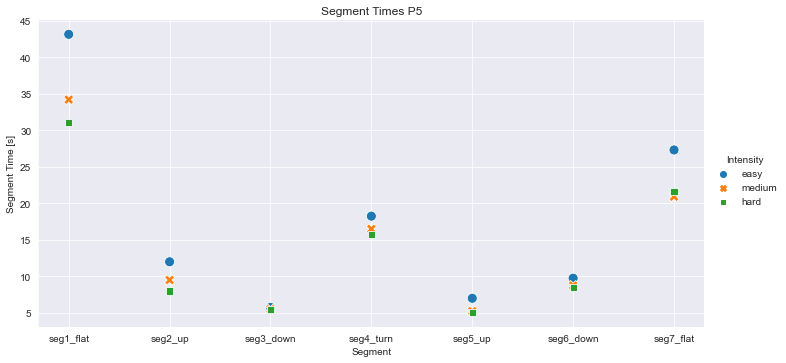

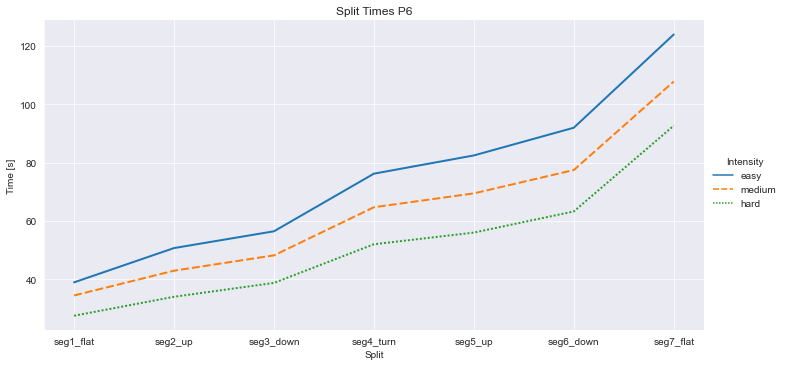

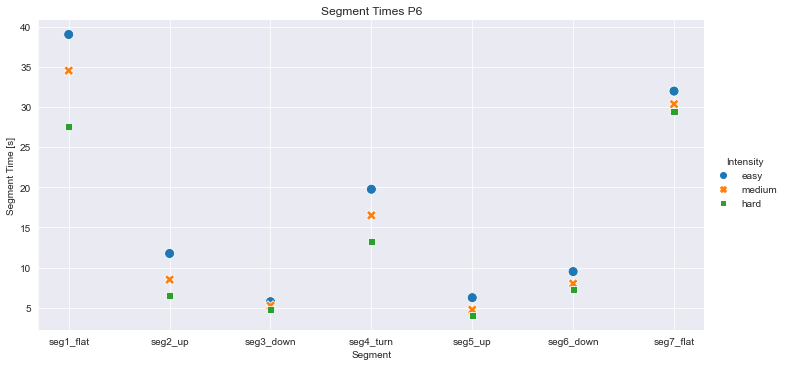

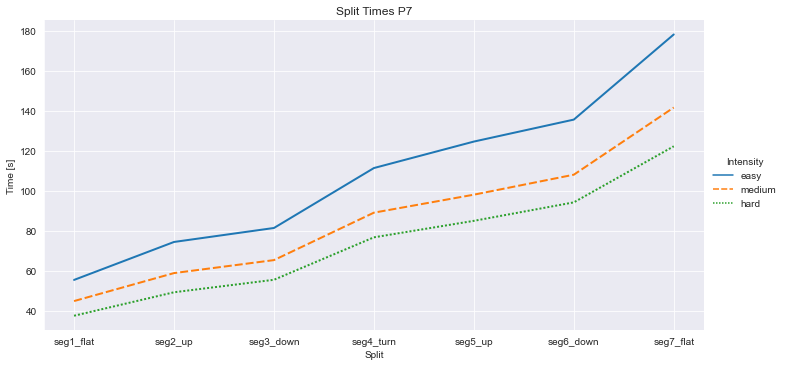

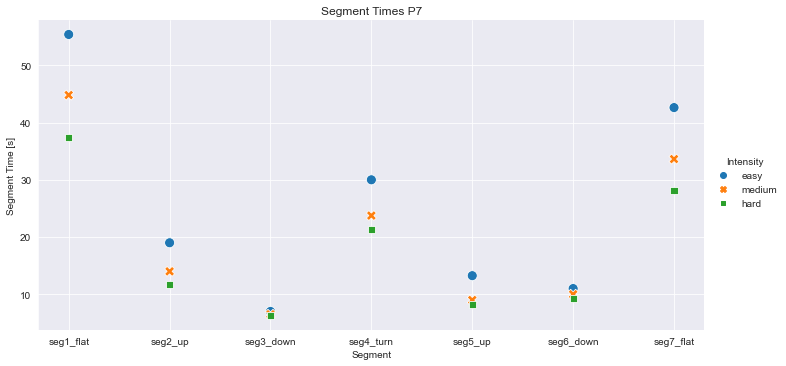

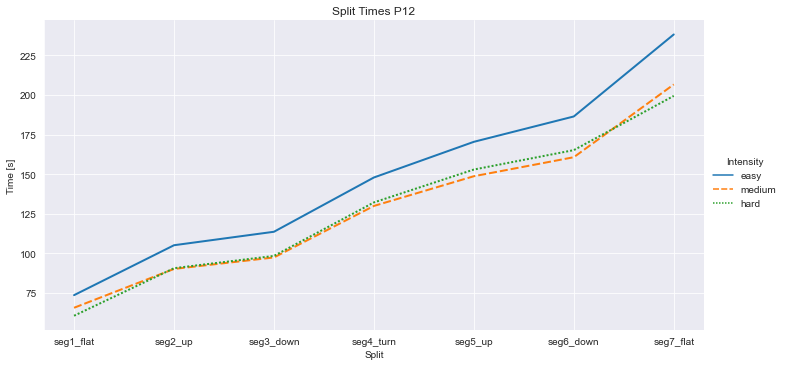

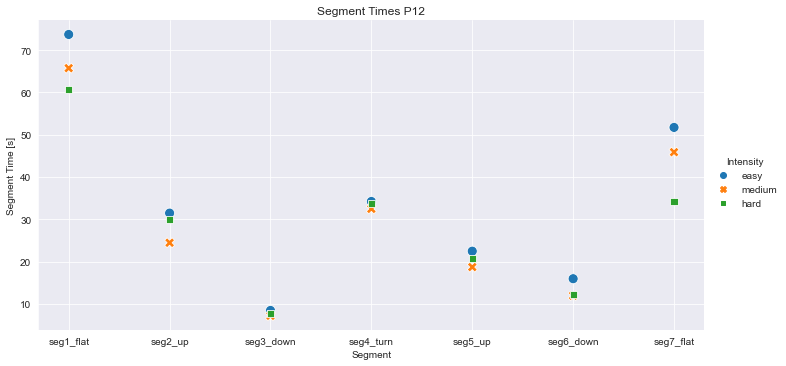

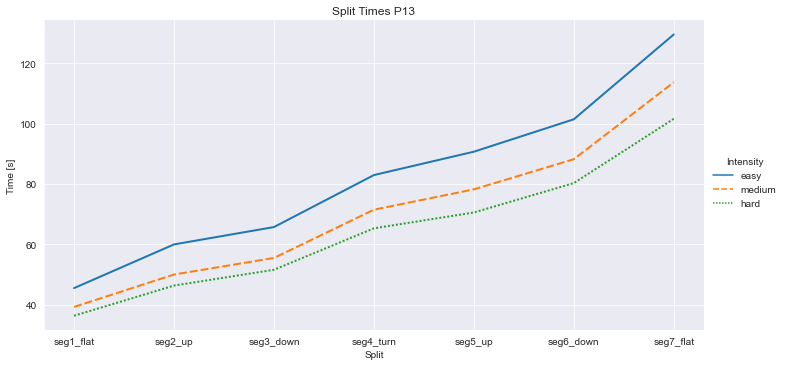

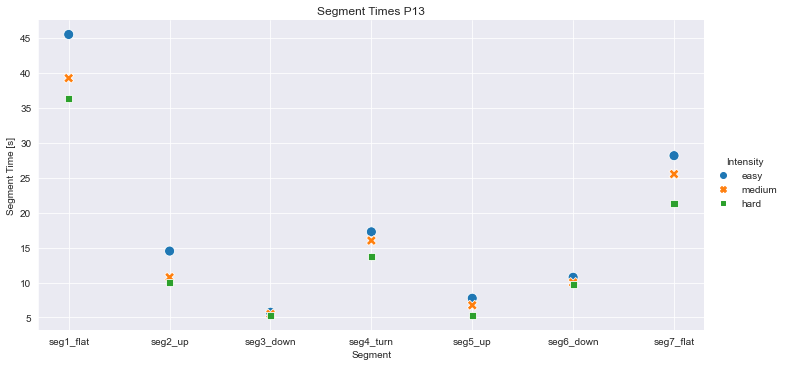

In [46]:
for p in splits.columns.get_level_values(0).unique():
    sns.relplot(data=splits[p], kind='line', aspect = 2, linewidth=2).set(title='Split Times '+ p, ylabel='Time [s]', xlabel='Split')
    sns.relplot(data=seg_time[p], aspect = 2,s=100).set(title='Segment Times '+ p, ylabel='Segment Time [s]', xlabel='Segment')


In [ ]:
# calculate relative Speed Increase Ratio 
# if ==1 --> equal relative increase with each intensity 
# if < 1 --> smaller relative increase from medium to hard than from easy to medium
# if > 1 --> smaller relative increase from easy to medium than from medium to hard
# example:
#    time easy = 60 seconds
#    time medium = 30 seconds   --> increase of 50 %
#    time hard = 20 seconds     --> increase of 33 %
#  ==> Ratio = 1.5


In [106]:
ratio = pd.DataFrame(columns=splits.columns.get_level_values(0).unique(), index=splits.index)
for p in splits.columns.get_level_values(0).unique():
    em = splits[p]['medium']/splits[p]['easy']*100
    mh = splits[p]['hard']/splits[p]['medium']*100
    ratio[p]=em/mh
ratio.loc['even Ratio']=np.ones(6)

In [108]:
ratio

Participant,P3,P5,P6,P7,P12,P13
seg1_flat,0.982438,0.872269,1.107350,0.967557,0.965857,0.932055
seg2_up,0.955864,0.886148,1.069593,0.944665,0.853336,0.899398
seg3_down,0.949662,0.891688,1.061625,0.944839,0.848936,0.908308
seg4_turn,0.951113,0.904133,1.056119,0.928176,0.863872,0.942963
seg5_up,0.963439,0.894575,1.044342,0.907985,0.848552,0.956113
seg6_down,0.983331,0.897298,1.031163,0.913724,0.838779,0.955314
seg7_flat,0.869967,0.860707,1.012135,0.920948,0.898928,0.982038
even Ratio,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


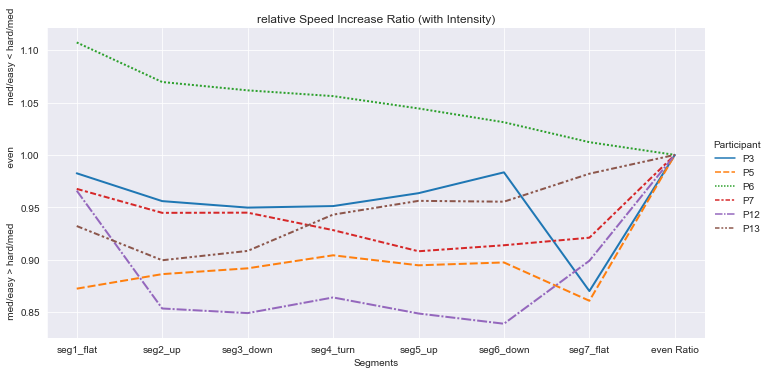

In [109]:
sns.relplot(data=ratio, aspect = 2, kind='line', linewidth=2).set(
        ylabel='               med/easy > hard/med                    even               med/easy < hard/med',
        xlabel='Segments',
        title='relative Speed Increase Ratio (with Intensity)'
    )


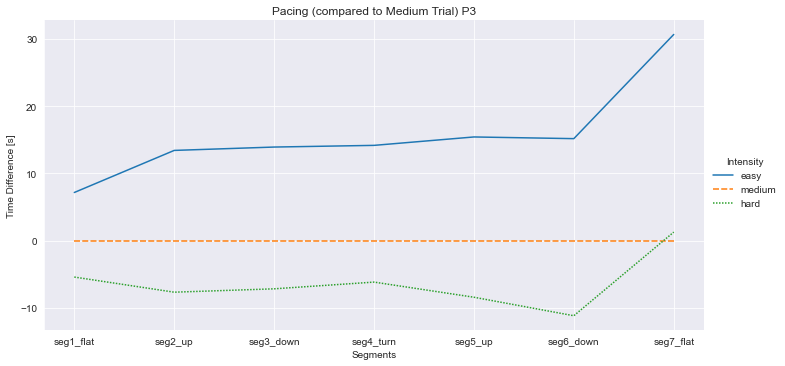

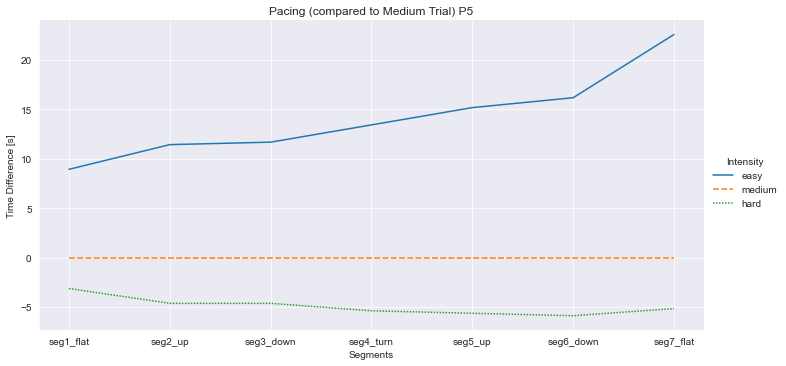

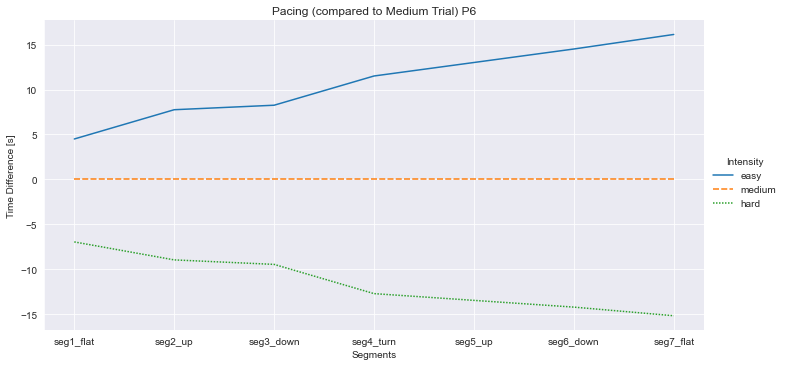

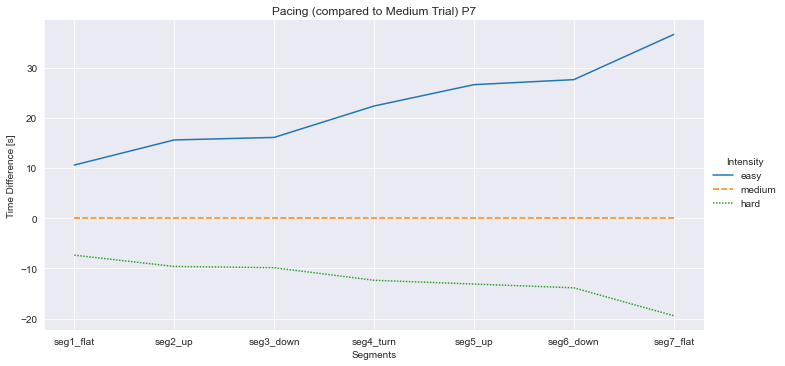

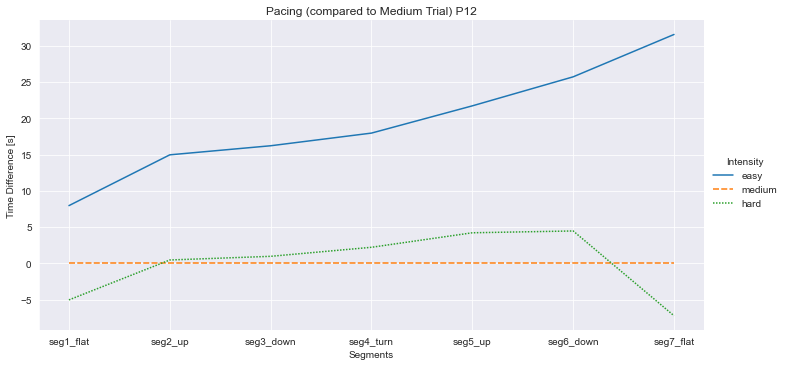

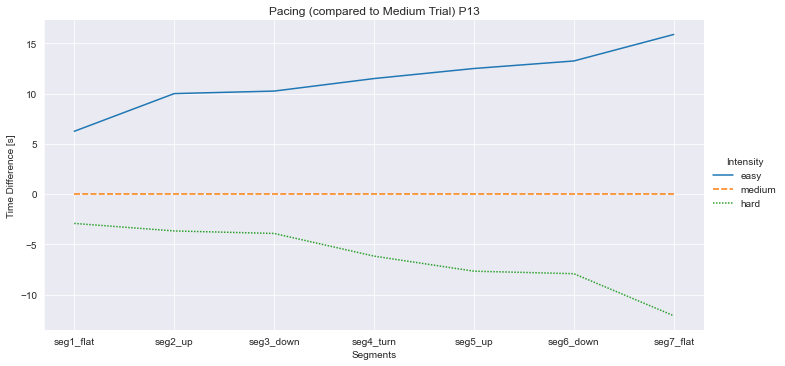

In [52]:
for p in splits.columns.get_level_values(0).unique():
    med = splits[p]['medium'].values
    sns.relplot(data=splits[p].apply(lambda x: x- med, axis=0), aspect=2, kind='line').set(
        ylabel='Time Difference [s]',
        xlabel='Segments',
        title='Pacing (compared to Medium Trial) '+ p
    )

# catplot

In [ ]:
segp = r'C:\Users\b1090197\OneDrive\Documents\XSki\xski\files\segment_times_T.csv'
sp = r'C:\Users\b1090197\OneDrive\Documents\XSki\xski\files\split_times_T.csv'

seg_time = pd.read_csv(segp)
seg_time.iloc[:,:2]=seg_time.iloc[:,:2].astype('category')
splits = pd.read_csv(sp)
splits.iloc[:,:2]=splits.iloc[:,:2].astype('category')

In [ ]:
seg_time

In [ ]:
sns.catplot(data=seg_time, aspect=2, x='Intensity', )